### Practical Notebook
Here we import the required libraries and data sets for training.

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

In [3]:
# Load train data
X_amp_train = np.load("Xtrain_amp.npy")
y_amp_train = np.load("ytrain_amp.npy")

In [4]:
# Load test data
X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")

In [5]:
# Load train data
X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")

In [6]:
# Load test data
X_mel_test = np.load("Xtest_mel.npy")
y_mel_test = np.load("ytest_mel.npy")

In [7]:
# Flatten spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)

### Part A: Feature Engineering, Baseline Models

#### Raw amplitude features

Here we apply PCA to our raw amplitude features in order to extract the 500 most significant components.

In [8]:
pca = PCA(n_components=500)

# standardize data
stand_X_amp_train = (X_amp_train - np.mean(X_amp_train)) / np.std(X_amp_train)
stand_X_amp_test = (X_amp_test - np.mean(X_amp_test)) / np.std(X_amp_test)

# create our PCA object that will calculate the first 500 components.
X_amp_train_reduced = pca.fit_transform(stand_X_amp_train)
X_amp_test_reduced = pca.transform(stand_X_amp_test)

# save reduced data as pickle
with open("X_amp_train_reduced.pickle", "wb") as file:
    pickle.dump(X_amp_train_reduced, file)
with open("X_amp_test_reduced.pickle", "wb") as file:
    pickle.dump(X_amp_test_reduced, file)

Once our data set is reduced in dimension, we use it to train a logistic regression classifier.

In [9]:
# load reduced data from pickle
with open('X_amp_train_reduced.pickle', "rb") as file:
    X_amp_train_reduced = pickle.load(file)
with open('X_amp_test_reduced.pickle', "rb") as file:
    X_amp_test_reduced = pickle.load(file)

In [10]:
# create logistic regression classifier
amp_lr_model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=1000)

# fit classifier
amp_lr_model.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_lr_model.pickle", "wb") as file:
    pickle.dump(amp_lr_model, file)

With our trained classifier, we make predictions and calculate the over all and per-class accuracies.

In [10]:
# load classifier from pickle
with open('amp_lr_model.pickle', "rb") as file:
    amp_lr_model = pickle.load(file)

AMP LR Model Mean Accuracy:  0.188
AMP LR Model Per-class Accuracies: [0.2   0.026 0.585 0.092 0.08  0.152 0.067 0.097 0.123 0.137]


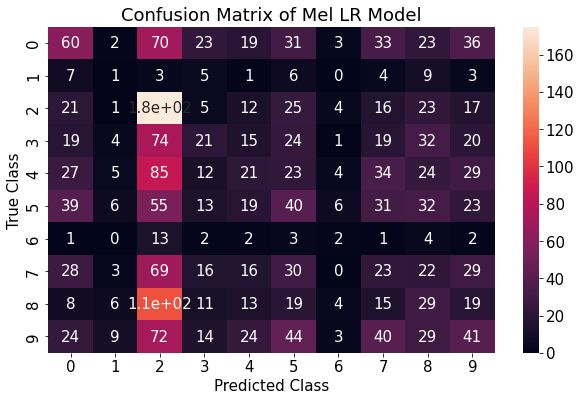

In [33]:
# make predictions
y_amp_preds = amp_lr_model.predict(X_amp_test_reduced)

# calculate accuracy and balanced accuracy
print("AMP LR Model Mean Accuracy: ", round(accuracy_score(y_amp_preds, y_amp_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_amp_test, y_amp_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("AMP LR Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Mel LR Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### Mel amplitude features

Here we do the same procedure for our Mel spectogram features

In [35]:
# standardize data
stand_X_mel_train_flat = (X_mel_train_flat - np.mean(X_mel_train_flat)) / np.std(X_mel_train_flat)
stand_X_mel_test_flat = (X_mel_test_flat - np.mean(X_mel_test_flat)) / np.std(X_mel_test_flat)

# create our PCA object that will calculate the first 500 components.
X_mel_train_reduced = pca.fit_transform(stand_X_mel_train_flat)
X_mel_test_reduced = pca.transform(stand_X_mel_test_flat)

# save reduced data as pickle
with open("X_mel_train_reduced.pickle", "wb") as file:
    pickle.dump(X_mel_train_reduced, file)
with open("X_mel_test_reduced.pickle", "wb") as file:
    pickle.dump(X_mel_test_reduced, file)

In [36]:
# load reduced data from pickle
with open('X_mel_train_reduced.pickle', "rb") as file:
    X_mel_train_reduced = pickle.load(file)
with open('X_mel_test_reduced.pickle', "rb") as file:
    X_mel_test_reduced = pickle.load(file)

In [37]:
# create logistic regression classifier
mel_lr_model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=3000)

# fit classifier
mel_lr_model.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_lr_model.pickle", "wb") as file:
    pickle.dump(mel_lr_model, file)

In [38]:
# load classifier from pickle
with open('mel_lr_model.pickle', "rb") as file:
    mel_lr_model = pickle.load(file)

Mel LR Model Mean Accuracy:  0.256
Mel LR Model Per-class Accuracies: [0.187 0.462 0.013 0.188 0.223 0.288 0.433 0.106 0.953 0.147]


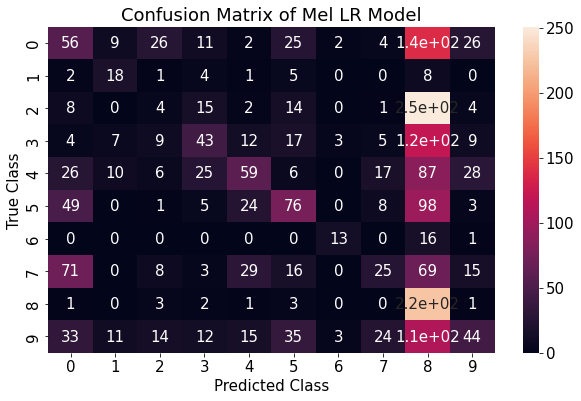

In [39]:
# make predictions
y_mel_preds = mel_lr_model.predict(X_mel_test_reduced)

# calculate accuracy and balanced accuracy
print("Mel LR Model Mean Accuracy: ", round(accuracy_score(y_mel_preds, y_mel_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_mel_test, y_mel_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("Mel LR Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Mel LR Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Part B: More Modeling

#### B1: First Step
##### Random Forest Classifier on raw amplitude features
Here we use a Random Forest Classifier on our raw amplitude features and calculate accuracies.

In [17]:
amp_rf_model = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight="balanced")

amp_rf_model.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_rf_model.pickle", "wb") as file:
    pickle.dump(amp_rf_model, file)

AMP RF Model Mean Accuracy:  0.248
AMP RF Model Per-class Accuracies: [0.23  0.    0.746 0.035 0.11  0.39  0.033 0.102 0.212 0.127]


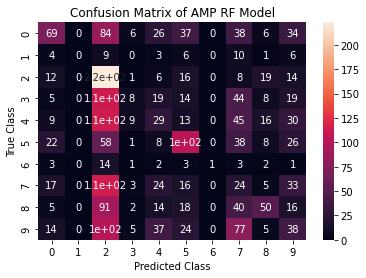

In [18]:
# load classifier from pickle
with open('amp_rf_model.pickle', "rb") as file:
    amp_rf_model = pickle.load(file)

# make predictions
y_amp_preds = amp_rf_model.predict(X_amp_test_reduced)

# calculate accuracy and balanced accuracy
print("AMP RF Model Mean Accuracy: ", round(accuracy_score(y_amp_preds, y_amp_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_amp_test, y_amp_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("AMP RF Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of AMP RF Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

##### Random Forest Classifier on raw amplitude features
Here we use a Random Forest Classifier on our Mel spectogram features and calculate accuracies.

In [19]:
mel_rf_model = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight="balanced")

mel_rf_model.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_rf_model.pickle", "wb") as file:
    pickle.dump(mel_rf_model, file)

Mel RF Model Mean Accuracy:  0.334
Mel RF Model Per-class Accuracies: [0.28  0.256 0.211 0.424 0.216 0.375 0.167 0.356 0.441 0.437]


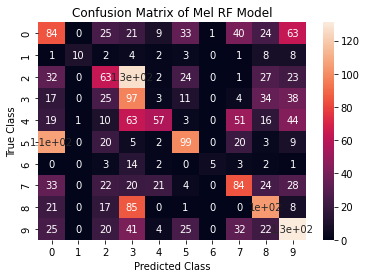

In [20]:
# load classifier from pickle
with open('mel_rf_model.pickle', "rb") as file:
    mel_rf_model = pickle.load(file)

# make predictions
y_mel_preds = mel_rf_model.predict(X_mel_test_reduced)

# calculate accuracy and balanced accuracy
print("Mel RF Model Mean Accuracy: ", round(accuracy_score(y_mel_preds, y_mel_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_mel_test, y_mel_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("Mel RF Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Mel RF Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### B2: More Complicated Models–Hyperparameter Tuning and Validation
##### Hyperparameter grid search on Random Forest Classifier for raw amplitude features.

In [21]:
# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'n_estimators' : [360, 400, 440, 480, 520]}

# instantiate our template model
amp_rf = RandomForestClassifier()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
amp_rf_cv = GridSearchCV(estimator=amp_rf, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
amp_rf_cv.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_rf_cv.pickle", "wb") as file:
    pickle.dump(amp_rf_cv, file)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [42]:
# load classifier from pickle
with open('amp_rf_cv.pickle', "rb") as file:
    amp_rf_cv = pickle.load(file)

# convert our results to a pd.DataFrame
amp_rf_results = pd.DataFrame(amp_rf_cv.cv_results_).sort_values(by=['param_n_estimators'])
amp_rf_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,46.711472,1.254675,0.267201,0.095020,360,{'n_estimators': 360},0.234923,0.281728,0.248425,0.195495,0.212613,0.234637,0.029749,5
1,49.096830,3.222326,0.234506,0.048186,400,{'n_estimators': 400},0.247525,0.298830,0.232223,0.196396,0.201802,0.235355,0.036961,4
2,49.288626,0.689761,0.191589,0.007699,440,{'n_estimators': 440},0.241224,0.304230,0.238524,0.192793,0.212613,0.237877,0.037644,3
3,52.507317,1.097540,0.183349,0.020124,480,{'n_estimators': 480},0.249325,0.281728,0.251125,0.194595,0.221622,0.239679,0.029499,2
4,51.982988,5.756396,0.131888,0.009185,520,{'n_estimators': 520},0.259226,0.288929,0.240324,0.204505,0.215315,0.241660,0.030395,1


##### Hyperparameter grid search on Random Forest Classifier for Mel spectogram features.

In [23]:
param_grid = {'n_estimators' : [360, 400, 440, 480, 520]}

# instantiate our template model
mel_rf = RandomForestClassifier()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
mel_rf_cv = GridSearchCV(estimator=mel_rf, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
mel_rf_cv.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_rf_cv.pickle", "wb") as file:
    pickle.dump(mel_rf_cv, file)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [41]:
# load classifier from pickle
with open('mel_rf_cv.pickle', "rb") as file:
    mel_rf_cv = pickle.load(file)

# convert our results to a pd.DataFrame
mel_rf_results = pd.DataFrame(mel_rf_cv.cv_results_).sort_values(by=['param_n_estimators'])
mel_rf_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,30.941176,0.518681,0.143140,0.011554,360,{'n_estimators': 360},0.389739,0.478848,0.416742,0.454955,0.373874,0.422831,0.039240,5
1,34.143520,0.139804,0.142231,0.016674,400,{'n_estimators': 400},0.398740,0.477948,0.426643,0.466667,0.367568,0.427513,0.041228,1
2,37.644635,0.573864,0.165591,0.012302,440,{'n_estimators': 440},0.396040,0.474347,0.430243,0.458559,0.358559,0.423549,0.042027,4
3,40.917273,0.288891,0.168091,0.012939,480,{'n_estimators': 480},0.392439,0.476148,0.430243,0.472973,0.359459,0.426252,0.045372,2
4,40.236670,4.671192,0.130594,0.015379,520,{'n_estimators': 520},0.387939,0.470747,0.423942,0.454054,0.381081,0.423553,0.035299,3


##### Hyperparameter grid search on Support Vector Machine for raw amplitude features

In [26]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1.0, 10.0], 
              'kernel' : ['rbf'],}

# instantiate our template model
amp_svm = SVC()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
amp_svm_cv = GridSearchCV(estimator=amp_svm, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
amp_svm_cv.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_svm_cv.pickle", "wb") as file:
    pickle.dump(amp_svm_cv, file)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [43]:
# load classifier from pickle
with open('amp_svm_cv.pickle', "rb") as file:
    amp_svm_cv = pickle.load(file)

# convert our results to a pd.DataFrame
amp_svm_cv_results = pd.DataFrame(amp_svm_cv.cv_results_).sort_values(by=['param_C'])
amp_svm_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,36.072002,0.222367,3.288158,0.072557,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.129613,0.130513,0.129613,0.129730,0.129730,0.129840,0.000341,5
1,38.327776,0.732111,3.198180,0.081820,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.129613,0.143114,0.182718,0.129730,0.118018,0.140639,0.022490,4
2,38.793120,0.222849,3.143801,0.053854,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.164716,0.162016,0.171017,0.162162,0.142342,0.160451,0.009624,3
3,36.599572,0.636716,3.024429,0.173999,1.0,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.181818,0.178218,0.172817,0.181081,0.159459,0.174679,0.008241,2
4,28.872737,10.767731,2.855964,0.774573,10.0,rbf,"{'C': 10.0, 'kernel': 'rbf'}",0.189919,0.223222,0.193519,0.147748,0.187387,0.188359,0.024061,1


##### Hyperparameter grid search on Support Vector Machine for Mel spectogram features

In [45]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1.0, 10.0], 
              'kernel' : ['rbf'],}

# instantiate our template model
mel_svm = SVC()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
mel_svm_cv = GridSearchCV(estimator=mel_svm, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
mel_svm_cv.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_svm_cv.pickle", "wb") as file:
    pickle.dump(mel_svm_cv, file)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [46]:
# load classifier from pickle
with open('mel_svm_cv.pickle', "rb") as file:
    mel_svm_cv_model = pickle.load(file)

# convert our results to a pd.DataFrame
mel_svm_cv_results = pd.DataFrame(mel_svm_cv.cv_results_).sort_values(by=['param_C'])
mel_svm_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,36.212758,0.062470,3.173629,0.049189,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.129613,0.130513,0.129613,0.129730,0.129730,0.129840,0.000341,4
1,36.437783,0.246432,3.169195,0.048785,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.129613,0.130513,0.129613,0.129730,0.129730,0.129840,0.000341,4
2,35.097789,0.224895,3.088714,0.029056,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.217822,0.171017,0.170117,0.170270,0.198198,0.185485,0.019413,3
3,29.246581,0.829310,2.147712,0.882947,1.0,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.291629,0.272727,0.246625,0.258559,0.267568,0.267421,0.015002,2
4,20.685105,7.819809,2.575198,0.730111,10.0,rbf,"{'C': 10.0, 'kernel': 'rbf'}",0.282628,0.337534,0.351035,0.320721,0.318018,0.321987,0.023030,1


In [47]:
print((0.235 + 0.423) / 2) 5
print((0.235 + 0.428) / 2) 3 
print((0.238 + 0.424) / 2) 4
print((0.240 + 0.426) / 2) 1
print((0.242 + 0.424) / 2) 1




0.32899999999999996
0.3315
0.33099999999999996
0.33299999999999996
0.33299999999999996


In [48]:
#         \textsc{0.001} & & 0.123 & 0.123 & 5 \\
#         \textsc{0.01}  & & 0.141 & 0.123 & 5 \\
#         \textsc{0.1}   & & 0.160 & 0.185 & 5 \\
#         \textsc{1}     & & 0.175 & 0.267 & 5 \\
#         \textsc{10}    & & 0.188 & 0.322 & 5 \\

print((0.123 + 0.123) / 2) 5
print((0.141 + 0.123) / 2) 4
print((0.160 + 0.185) / 2) 3
print((0.175 + 0.267) / 2) 2
print((0.188 + 0.322) / 2) 1

0.123
0.132
0.1725
0.221
0.255
